Importing Important libraries

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split

Importing Data into pandas dataframe

In [37]:
dataset = pd.read_csv('./Data/daily-min-temperatures.csv', header=0, index_col=0)
dataset.head(5)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Visualize the data 

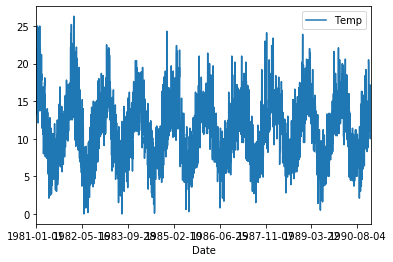

In [38]:
dataset.plot()

Obtained the auto correlation of temperature  

In [39]:
dataframe = pd.concat([dataset.shift(1)['Temp'], dataset['Temp']], axis=1)
print(dataframe.head(5))
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

            Temp  Temp
Date                  
1981-01-01   NaN  20.7
1981-01-02  20.7  17.9
1981-01-03  17.9  18.8
1981-01-04  18.8  14.6
1981-01-05  14.6  15.8
           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


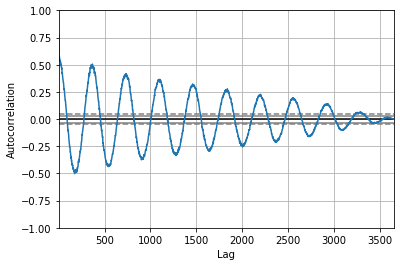

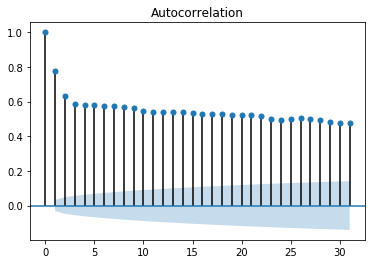

In [40]:
autocorrelation_plot(dataset)
plt.show()
plot_acf(dataset, lags=31)
plt.show()

Test train split of data

In [49]:
X = dataset.values

In [61]:
test_size = 0.001
len_X = len(X)
split_index = int((len_X - len_X*test_size))
X_train, X_test = X[1:split_index], X[split_index:]

In [62]:
print(len(X_train))
print(len(X_test))

3645
4


In [65]:
ar_model = AR(X_train)
ar_model = ar_model.fit()
print('Lag: %s' % ar_model.k_ar)
print('Coefficients: %s' % ar_model.params)
# make predictions
predictions = ar_model.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=True)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], X_test[i]))
error = mean_squared_error(X_test, predictions)
print('Test MSE: %.3f' % error)

Lag: 29
Coefficients: [ 0.55666544  0.58841812 -0.09091952  0.04843708  0.03991905  0.03936916
  0.02599544  0.04476034  0.01292976  0.03729944 -0.00076312  0.00479019
  0.01830128  0.02688846  0.00062336  0.0245334   0.00741195  0.00996412
  0.03425708 -0.00885139  0.02442688  0.01892817  0.01222743 -0.01854954
 -0.00185933  0.01669573  0.01968301  0.01006129  0.00601314 -0.00153288]
predicted=13.430121, expected=13.600000
predicted=13.274476, expected=13.500000
predicted=13.361221, expected=15.700000
predicted=13.399179, expected=13.000000
Test MSE: 1.427


In [ ]:
df = pd.DataFrame({'A':[1,2,3], 'B': [4,5,6]})